## Import Library

In [708]:
import pandas as pd
pd.set_option("display.max_column", 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime module
from datetime import datetime, date, timedelta

# 1. Salesdata

## 1. Import Salesdata

In [709]:
# Dataset = Salesdata.csv

df = pd.read_csv("Salesdata.csv")
df.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,SALE ORDER,ProductKey,OrderDateKey,ORDER DATE,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
0,43793001,-1,11000,SO43793,344,20170712,12/07/2017,20170722,20170719.0,9,1,3399.99,3399.99,0,1912.1544,1912.1544,3399.99
1,51522001,-1,11000,SO51522,353,20190621,21/06/2019,20190701,20190628.0,9,1,2319.99,2319.99,0,1265.6195,1265.6195,2319.99
2,51522002,-1,11000,SO51522,485,20190621,21/06/2019,20190701,20190628.0,9,1,21.98,21.98,0,8.2205,8.2205,21.98
3,57418001,-1,11000,SO57418,573,20191004,04/10/2019,20191014,20191011.0,9,1,2384.07,2384.07,0,1481.9379,1481.9379,2384.07
4,57418002,-1,11000,SO57418,541,20191004,04/10/2019,20191014,20191011.0,9,1,28.99,28.99,0,10.8423,10.8423,28.99


## 2. Data cleaning Salesdata

In [710]:
# Get the list of columns

df.columns

Index(['SalesOrderLineKey', 'ResellerKey', 'CustomerKey', 'SALE ORDER',
       'ProductKey', 'OrderDateKey', 'ORDER DATE', 'DueDateKey', 'ShipDateKey',
       'SalesTerritoryKey', 'Order Quantity', 'Unit Price', 'Extended Amount',
       'Unit Price Discount Pct', 'Product Standard Cost',
       'Total Product Cost', 'Sales Amount'],
      dtype='object')

In [711]:
# Drop unnecessary columns

df = df[['CustomerKey','SALE ORDER','ORDER DATE', 'Sales Amount']].copy()
df.head()

,CustomerKey,SALE ORDER,ORDER DATE,Sales Amount
0,11000,SO43793,12/07/2017,3399.99
1,11000,SO51522,21/06/2019,2319.99
2,11000,SO51522,21/06/2019,21.98
3,11000,SO57418,04/10/2019,2384.07
4,11000,SO57418,04/10/2019,28.99


In [712]:
# Check the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerKey   60398 non-null  int64  
 1   SALE ORDER    60398 non-null  object 
 2   ORDER DATE    60398 non-null  object 
 3   Sales Amount  60398 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [713]:
# Change OrderDate column dtype to datetime

df['ORDER DATE'] = pd.to_datetime(df['ORDER DATE'], format="%d/%m/%Y")

# check the data info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerKey   60398 non-null  int64         
 1   SALE ORDER    60398 non-null  object        
 2   ORDER DATE    60398 non-null  datetime64[ns]
 3   Sales Amount  60398 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [714]:
# Checking if the OrderDate column data match the format by returning the min and max of day/month/year

# Check the day column
day_date = df['ORDER DATE'].dt.day
print("day_min: %i" %day_date.min())
print("day_max: %i \n" %day_date.max())

# Check the month column
month_date = df['ORDER DATE'].dt.month
print("month_min: %i" %month_date.min())
print("month_max: %i \n" %month_date.max())

# Check the month column
year_date = df['ORDER DATE'].dt.year
print("year_min: %i" %year_date.min())
print("year_max: %i \n" %year_date.max())

day_min: 1
day_max: 31 

month_min: 1
month_max: 12 

year_min: 2017
year_max: 2020 



In [715]:
# Change column name

# the column name is already pretty good, but I prefer use lowercase and use underscore instead of space, 
# for me, it's easier to read

df.rename(columns={'CustomerKey':'customer_key','SALE ORDER':'sales_order_number',
         'ORDER DATE':'order_date', 'Sales Amount':'sales_amount'}, inplace = True) 
df.head()

,customer_key,sales_order_number,order_date,sales_amount
0,11000,SO43793,2017-07-12,3399.99
1,11000,SO51522,2019-06-21,2319.99
2,11000,SO51522,2019-06-21,21.98
3,11000,SO57418,2019-10-04,2384.07
4,11000,SO57418,2019-10-04,28.99


In [716]:
# Check point

df_copy = df.copy()
# df = df_copy

## 3. Creating RFM Table

In [717]:
# We need to group the rfm by the customer, sales order number, order date to remove duplicates
# and sum the sales amount

df = df.groupby(['customer_key','sales_order_number','order_date']).sales_amount.sum()
df.head()

customer_key  sales_order_number  order_date
11000         SO43793             2017-07-12    3399.99
              SO51522             2019-06-21    2341.97
              SO57418             2019-10-04    2507.03
11001         SO43767             2017-07-09    3374.99
              SO51493             2019-06-19    2419.93
Name: sales_amount, dtype: float64

In [718]:
# Reset index

df = df.reset_index()
df.head(10)

,customer_key,sales_order_number,order_date,sales_amount
0,11000,SO43793,2017-07-12,3399.99
1,11000,SO51522,2019-06-21,2341.97
2,11000,SO57418,2019-10-04,2507.03
3,11001,SO43767,2017-07-09,3374.99
4,11001,SO51493,2019-06-19,2419.93
5,11001,SO72773,2020-05-12,588.96
6,11002,SO43736,2017-07-05,3399.99
7,11002,SO51238,2019-06-03,2294.99
8,11002,SO53237,2019-07-27,2419.06
9,11003,SO43701,2017-07-01,3399.99


In [719]:
# Recency Table

# I decided to add 1 day to prevent ambigous analysis/calculation in further step
# example = df.recency.min() = 0 will become 1

daydiff = (df.order_date.max()) - df.groupby('customer_key').order_date.max()
recency = daydiff.dt.days
recency = recency.reset_index()
recency = pd.DataFrame(recency)

recency = recency.rename(columns={'order_date':'recency'})
recency.head()

,customer_key,recency
0,11000,255
1,11001,34
2,11002,324
3,11003,248
4,11004,257


In [720]:
# Frequency Table

freq = df.groupby('customer_key').sales_order_number.count().reset_index()
freq = freq.rename(columns = {'sales_order_number':'frequency'})
freq.head()

,customer_key,frequency
0,11000,3
1,11001,3
2,11002,3
3,11003,3
4,11004,3


In [721]:
# Monetary Table

monetary = df.groupby('customer_key').sales_amount.sum().reset_index()
monetary = monetary.rename(columns = {'sales_amount':'monetary'})
monetary.head()

,customer_key,monetary
0,11000,8248.99
1,11001,6383.88
2,11002,8114.04
3,11003,8139.29
4,11004,8196.01


In [722]:
# Merge R, F, M Table into 1 DataFrame

rfm = pd.merge(recency, freq, on = 'customer_key',how = 'inner')
rfm = pd.merge(rfm, monetary, on = 'customer_key',how = 'inner')
rfm.head()

,customer_key,recency,frequency,monetary
0,11000,255,3,8248.99
1,11001,34,3,6383.88
2,11002,324,3,8114.04
3,11003,248,3,8139.29
4,11004,257,3,8196.01


In [723]:
rfm.describe()

,customer_key,recency,frequency,monetary
count,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,174.667983,1.496375,1588.329216
std,5336.015523,145.644062,1.101139,2124.231717
min,11000.000000,0.000000,1.000000,2.290000
25%,15620.750000,71.000000,1.000000,49.970000
50%,20241.500000,153.000000,1.000000,270.265000
75%,24862.250000,248.000000,2.000000,2511.275000
max,29483.000000,1080.000000,28.000000,13295.380000


# 2. Customerdata

## 1. Import Customerdata

In [724]:
# Dataset = Customerdata.csv

df = pd.read_csv("Customerdata.csv")
df.head()

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code
0,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700
1,11001,AW00011001,Eugene Huang,Seaford,Victoria,Australia,3198
2,11002,AW00011002,Ruben Torres,Hobart,Tasmania,Australia,7001
3,11003,AW00011003,Christy Zhu,North Ryde,New South Wales,Australia,2113
4,11004,AW00011004,Elizabeth Johnson,Wollongong,New South Wales,Australia,2500


## 2. Data cleaning Customerdata

In [725]:
# Get the list of columns

df.columns

Index(['CustomerKey', 'Customer ID', 'Customer', 'City', 'State-Province',
       'Country-Region', 'Postal Code'],
      dtype='object')

In [726]:
# Drop unnecessary columns

df = df[['CustomerKey','Country-Region']].copy()
df.head()

,CustomerKey,Country-Region
0,11000,Australia
1,11001,Australia
2,11002,Australia
3,11003,Australia
4,11004,Australia


In [727]:
# Check the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18484 non-null  int64 
 1   Country-Region  18484 non-null  object
dtypes: int64(1), object(1)
memory usage: 288.9+ KB


In [728]:
# Change column name

# the column name is already pretty good, but I prefer use lowercase and use underscore instead of space, 
# for me, it's easier to read

df.rename(columns={'CustomerKey':'customer_key','Country-Region':'country_region'}, inplace = True) 
df.head()

,customer_key,country_region
0,11000,Australia
1,11001,Australia
2,11002,Australia
3,11003,Australia
4,11004,Australia


In [729]:
# Check point

df_copy = df.copy()
# df = df_copy

## 3. Table G

In [730]:
geography = df.merge(monetary, on = 'customer_key',how = 'inner')
geography.head()

,customer_key,country_region,monetary
0,11000,Australia,8248.99
1,11001,Australia,6383.88
2,11002,Australia,8114.04
3,11003,Australia,8139.29
4,11004,Australia,8196.01


In [731]:
sum_geography = geography.groupby('country_region').monetary.sum().reset_index()
sum_geography['sum_sales_of_country']=sum_geography['monetary'].astype(int)
sum_geography.drop('monetary', axis='columns', inplace=True)
sum_geography

,country_region,sum_sales_of_country
0,Australia,9061000
1,Canada,1977844
2,France,2644017
3,Germany,2894312
4,United Kingdom,3391712
5,United States,9389789


In [732]:
sum_geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country_region        6 non-null      object
 1   sum_sales_of_country  6 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 200.0+ bytes


In [733]:
sum_geography.describe().astype(int)

,sum_sales_of_country
count,6
mean,4893112
std,3388156
min,1977844
25%,2706590
50%,3143012
75%,7643678
max,9389789


In [734]:
concat_df_describe = pd.concat([rfm.describe(), sum_geography.describe().astype(int)], axis=1)
concat_df_describe['geography']=concat_df_describe['sum_sales_of_country']
concat_df_describe.drop('sum_sales_of_country', axis='columns', inplace=True)
concat_df_describe

,customer_key,recency,frequency,monetary,geography
count,18484.000000,18484.000000,18484.000000,18484.000000,6
mean,20241.500000,174.667983,1.496375,1588.329216,4893112
std,5336.015523,145.644062,1.101139,2124.231717,3388156
min,11000.000000,0.000000,1.000000,2.290000,1977844
25%,15620.750000,71.000000,1.000000,49.970000,2706590
50%,20241.500000,153.000000,1.000000,270.265000,3143012
75%,24862.250000,248.000000,2.000000,2511.275000,7643678
max,29483.000000,1080.000000,28.000000,13295.380000,9389789


# EDA RFMG

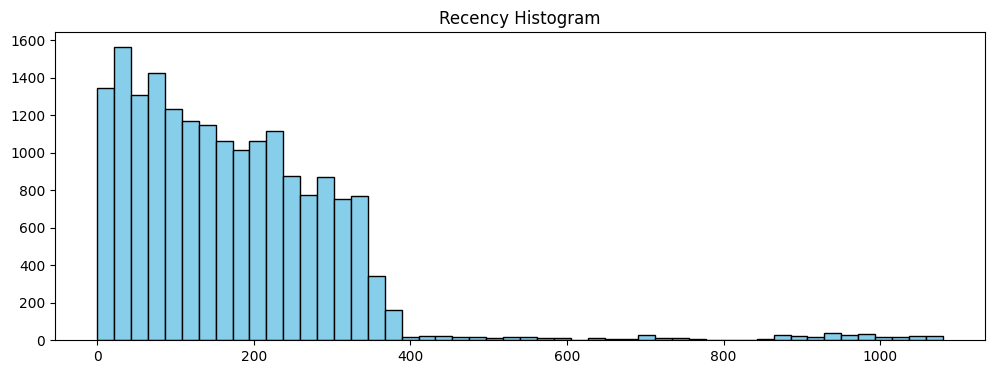

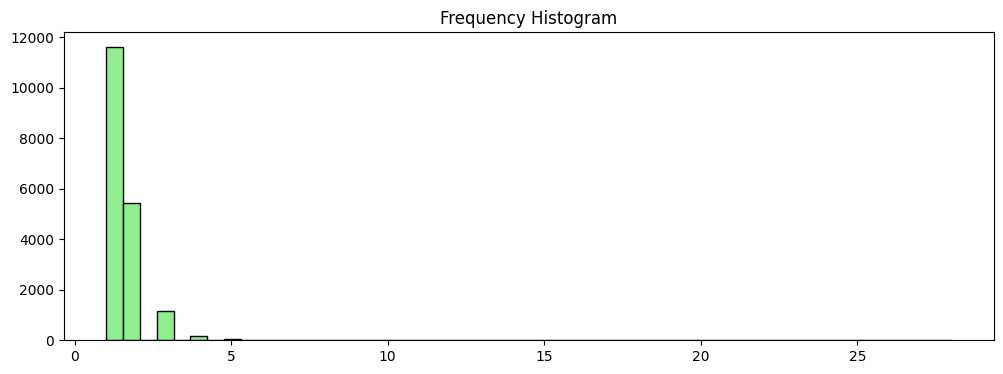

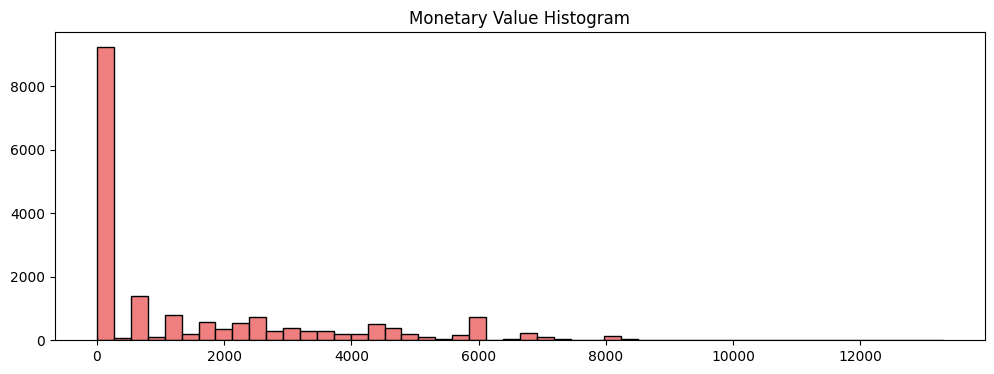

In [735]:
plt.figure(figsize=(12, 4))
plt.hist(rfm['recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency Histogram')
plt.show()

plt.figure(figsize=(12, 4))
plt.hist(rfm['frequency'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency Histogram')
plt.show()

plt.figure(figsize=(12, 4))
plt.hist(rfm['monetary'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Monetary Value Histogram')

plt.show()

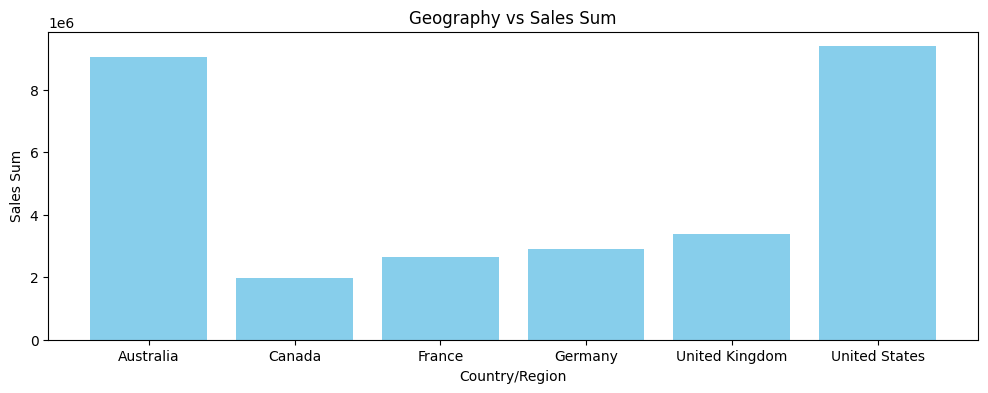

In [736]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 4))

plt.bar(sum_geography['country_region'], sum_geography['sum_sales_of_country'].astype(float), color='skyblue')

plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useOffset=False))

plt.title('Geography vs Sales Sum')
plt.xlabel('Country/Region')
plt.ylabel('Sales Sum')
plt.show()

<Axes: ylabel='monetary'>

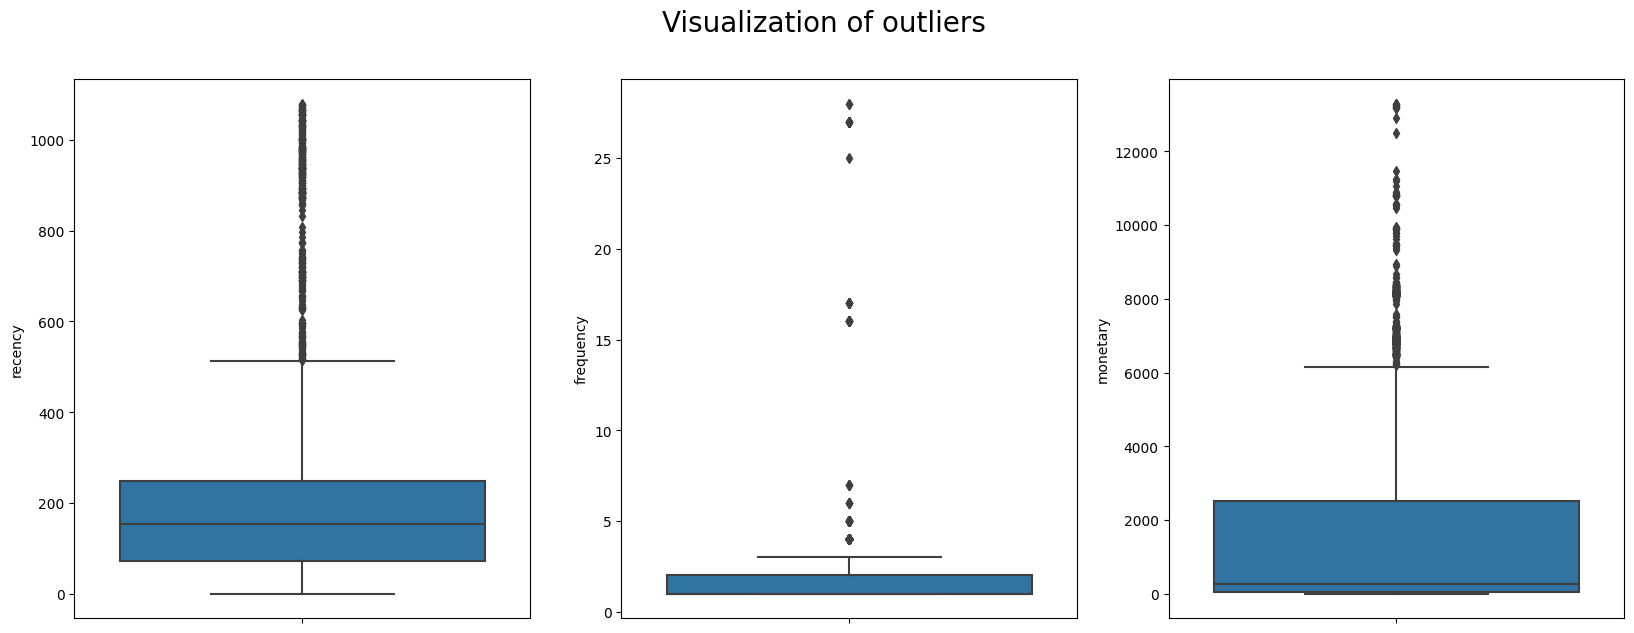

In [737]:
fig = plt.figure(figsize = (20,7))
fig.suptitle("Visualization of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=rfm,y="recency")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=rfm,y="frequency")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=rfm,y="monetary")


# 3. Calculate RFM Score

In [738]:
# R score
rfm["r"] = pd.qcut(rfm["recency"],4,labels=[4,3,2,1])

# F score
f_conditions = [(rfm['frequency'] == 1), (rfm['frequency'] == 2), (rfm['frequency'] == 3), (rfm['frequency'] >= 4)]
f_results = [1,2,3,4]
rfm['f'] = np.select(f_conditions, f_results)

# M score
rfm["m"] = pd.qcut(rfm["monetary"],4,labels=[1,2,3,4])

# RFM Combined Score
rfm["rfm_score"] = rfm["r"].astype(str) +rfm["f"].astype(str) + rfm["m"].astype(str)

rfm.head()

,customer_key,recency,frequency,monetary,r,f,m,rfm_score
0,11000,255,3,8248.99,1,3,4,134
1,11001,34,3,6383.88,4,3,4,434
2,11002,324,3,8114.04,1,3,4,134
3,11003,248,3,8139.29,2,3,4,234
4,11004,257,3,8196.01,1,3,4,134


In [739]:
# RFM Segmentation

rfm_seg = {
    r'444': "Champions",
    r'[2-4][3-4][2-4]': "Loyal Customers",
    r'[2-4][2-4]4': "Big Spender",
    r'4[1-3][1-4]': "Recent Customers",
    r'[2-4][1-3][1-4]': "Needs Attention",
    r'1[2-4][1-4]': "Almost Lost",
    r'11[1-4]': "Lost Customers"
}

rfm['Segment'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(rfm_seg, regex=True)
rfm.head()

,customer_key,recency,frequency,monetary,r,f,m,rfm_score,Segment
0,11000,255,3,8248.99,1,3,4,134,Almost Lost
1,11001,34,3,6383.88,4,3,4,434,Loyal Customers
2,11002,324,3,8114.04,1,3,4,134,Almost Lost
3,11003,248,3,8139.29,2,3,4,234,Loyal Customers
4,11004,257,3,8196.01,1,3,4,134,Almost Lost


# 4. Visualization

In [740]:
# Counting customer in each segment

seg_count = rfm.Segment.value_counts()
seg_count

Segment
Needs Attention     6573
Lost Customers      3511
Recent Customers    3392
Big Spender         2553
Loyal Customers     1315
Almost Lost         1103
Champions             37
Name: count, dtype: int64

In [741]:
# Create DataFrame for visualization

seg_count = pd.DataFrame(data = seg_count)
seg_count = seg_count.reset_index()
seg_count = seg_count.rename(columns={'index':'segment','Segment':'cust_count'})
seg_count.head()

,cust_count,count
0,Needs Attention,6573
1,Lost Customers,3511
2,Recent Customers,3392
3,Big Spender,2553
4,Loyal Customers,1315


In [742]:
# Bar Chart

palette_color = sns.color_palette("tab10")
plt.figure(figsize = (15,8))
sns.barplot(x = seg_count.segment,y = seg_count.cust_count, palette = palette_color)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'segment'

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Percentage of each segment 

percentage_dec = seg_count.cust_count / 18484
seg_percentage = round(percentage_dec, 4)
seg_count['percentage'] = seg_percentage * 100
seg_count

,segment,cust_count,percentage
0,Needs Attention,6573,35.56
1,Lost Customers,3511,18.99
2,Recent Customers,3392,18.35
3,Big Spender,2553,13.81
4,Loyal Customers,1315,7.11
5,Almost Lost,1103,5.97
6,Champions,37,0.20


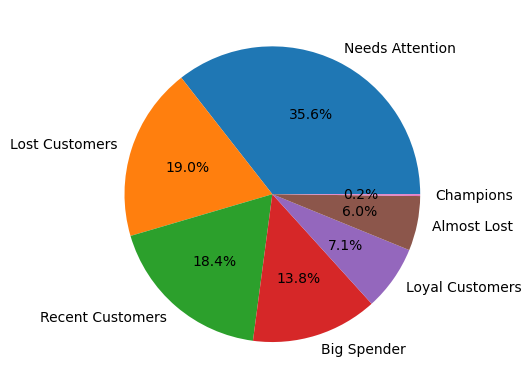

In [ ]:
# Pie Chart

palette_color = sns.color_palette("tab10")
plt.pie(seg_count.cust_count, labels = seg_count.segment, colors = palette_color, autopct='%1.1f%%')
plt.show()

In [ ]:
# export this rfm segmentation dataset to analyze more in viz tools to analyze more, like:
# why many customer churn, or what make customer champions, etc.

rfm.to_csv("rfm_segmented.csv", index = False)